In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes.csv')
df 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape 

(768, 9)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum() 

np.int64(0)

In [8]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


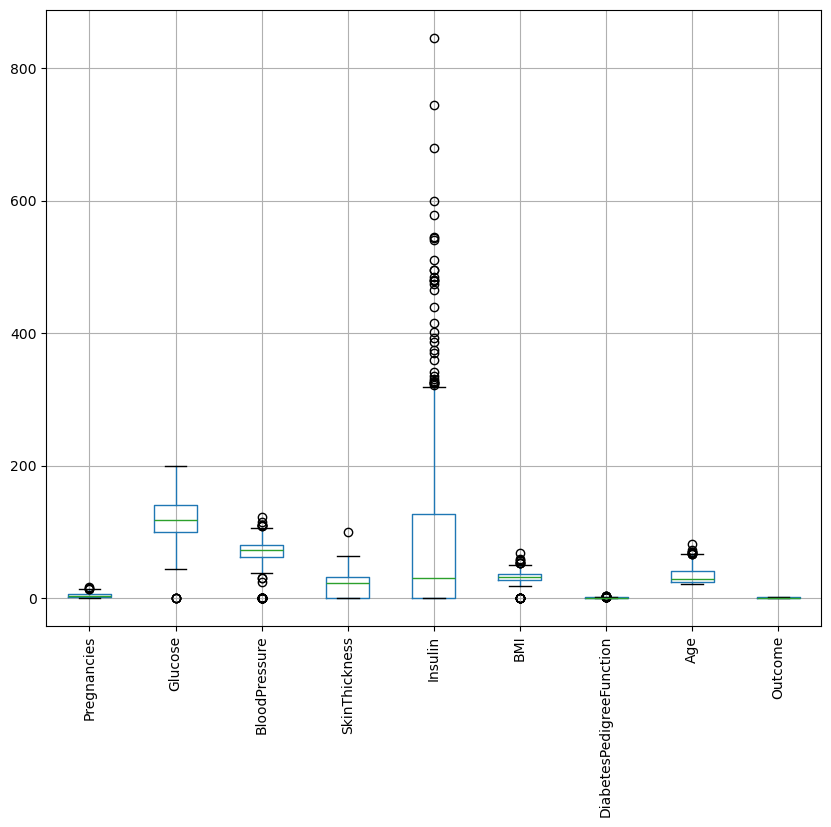

In [9]:
plt.figure(figsize=(10,8)) 

df.boxplot() 
plt.xticks(rotation=90) 
plt.show() 

In [10]:
df.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df1 = df.copy() 

In [12]:
zero_columns = [ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']
for col in zero_columns:
    df1[col] = df1[col].replace(0, np.nan) 
    mean = int(df1[col].mean(skipna=True)) 
    df1[col] = df1[col].replace(np.nan, mean) 

In [13]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [14]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.682292,30.435999,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,155.281250,85.021550,14.000,121.50000,155.0000,155.00000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


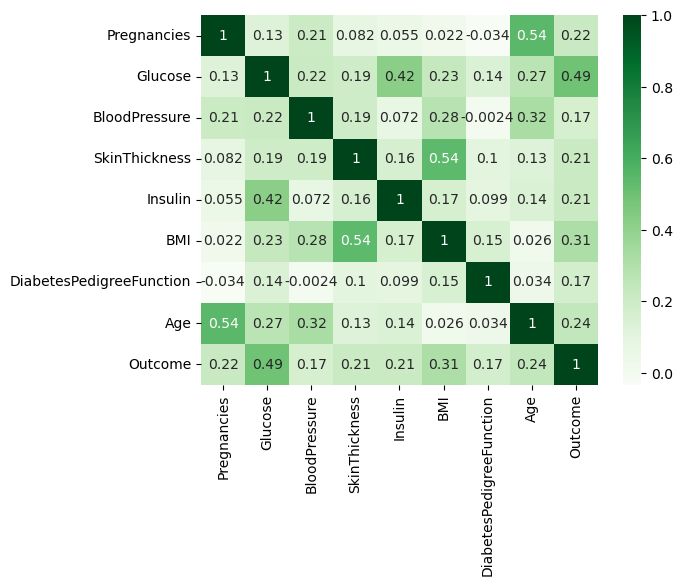

In [15]:
import seaborn as sns 

corr = df1.corr(method='pearson') 

sns.heatmap(corr, annot=True, cmap='Greens')
plt.show() 

In [16]:
x = df1.drop('Outcome', axis=1) 
y = df1['Outcome']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [18]:
k_estimate = int(np.sqrt(len(df)))
print(k_estimate)   


27


In [19]:
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsClassifier


k_range = range(1,40) 
cv_score = [] 

for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors=k) 
    score = cross_val_score(knn, x, y, cv=5, scoring='accuracy') 
    cv_score.append(score.mean()) 

In [20]:
for i,j in zip(k_range, cv_score):
    print(f"{i} - {j}") 

1 - 0.6888549359137593
2 - 0.701875901875902
3 - 0.7070622188269248
4 - 0.7109583227230287
5 - 0.7109837874543757
6 - 0.7174772939478822
7 - 0.7305322128851541
8 - 0.7474747474747474
9 - 0.7358034122740005
10 - 0.7370766488413547
11 - 0.7409897292250234
12 - 0.7435956200662082
13 - 0.7422884305237247
14 - 0.7422799422799423
15 - 0.7370936253289194
16 - 0.7331211272387743
17 - 0.7383583736524912
18 - 0.7409642644936761
19 - 0.746176046176046
20 - 0.7409557762498938
21 - 0.7487734487734488
22 - 0.7487819370172311
23 - 0.7487904252610134
24 - 0.746176046176046
25 - 0.7487819370172311
26 - 0.7409557762498938
27 - 0.7448433919022154
28 - 0.7448433919022154
29 - 0.750046685340803
30 - 0.75007215007215
31 - 0.7396316102198455
32 - 0.748756472285884
33 - 0.7383498854087089
34 - 0.7435616670910787
35 - 0.7461590696884814
36 - 0.7448603683897801
37 - 0.7422629657923776
38 - 0.7383413971649265
39 - 0.7422375010610305


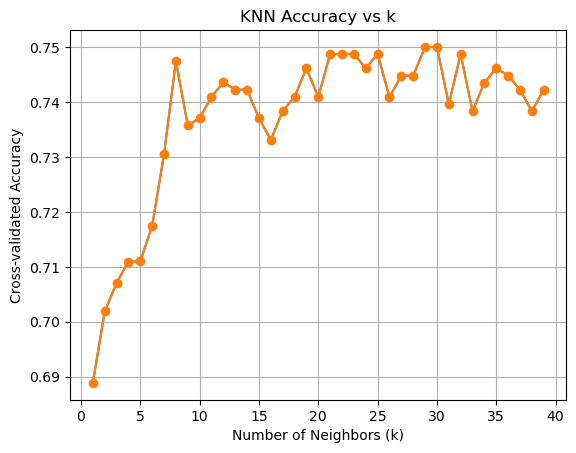

In [21]:
plt.plot(k_range, cv_score)
plt.plot(k_range, cv_score, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-validated Accuracy")
plt.title("KNN Accuracy vs k")
plt.grid()
plt.show()

In [22]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 

model = Pipeline([
    ('Scaler', StandardScaler()),
    ('Classifier', KNeighborsClassifier(n_neighbors=30))
])

In [23]:
model.fit(x_train, y_train) 

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Classifier', KNeighborsClassifier(n_neighbors=30))])

In [24]:
y_pred = model.predict(x_test)
y_pred 

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [25]:
from sklearn.metrics import classification_report, accuracy_score 

print(f"The Accuracy of the model is {accuracy_score(y_test, y_pred)*100}")
print(f"The Classification Report: \n {classification_report(y_test,y_pred)}")

The Accuracy of the model is 75.32467532467533
The Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        99
           1       0.70      0.55      0.61        55

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



In [26]:
x_train.head(1) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,72.0,29.0,155.0,32.0,0.304,21


In [27]:
new_data = [[0, 75, 70, 25, 100, 28, 0.5, 35]]

prediction = model.predict(new_data)[0]
if prediction == 1:
    print("Prediction: Diabetes")
else:
    print("Prediction: Healthy")

Prediction: Healthy


In [28]:
new_data2 = [[5, 150, 120, 40, 200, 40, 4.5, 60]]

prediction = model.predict(new_data2)[0]
if prediction == 1:
    print("Prediction: Diabetes")
else:
    print("Prediction: Healthy")

Prediction: Diabetes


In [31]:
import pickle

with open('diabetesmodel.pkl', 'wb') as f:
    pickle.dump(model, f) 